<a href="https://colab.research.google.com/github/Gaurav9693089415/Data-Science-Assignment-/blob/main/NLP_Naive_Bayes_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Tasks
1. Data Exploration and Preprocessing

•	Load the "blogs_categories.csv" dataset and perform an exploratory data analysis to understand its structure and content.

•	Preprocess the data by cleaning the text (removing punctuation, converting to lowercase, etc.), tokenizing, and removing stopwords.

•	Perform feature extraction to convert text data into a format that can be used by the Naive Bayes model, using techniques such as TF-IDF.


In [5]:
import pandas as pd

In [6]:
from google.colab import files

In [7]:
df=pd.read_csv('blogs (2).csv')

In [8]:
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


**EDA**

In [9]:
df['len']=df['Data'].apply(len)

In [10]:
df.head()

,Data,Labels,len
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,5972
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,1336
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,3116
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,15910
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,3264


<Figure size 4000x2000 with 0 Axes>

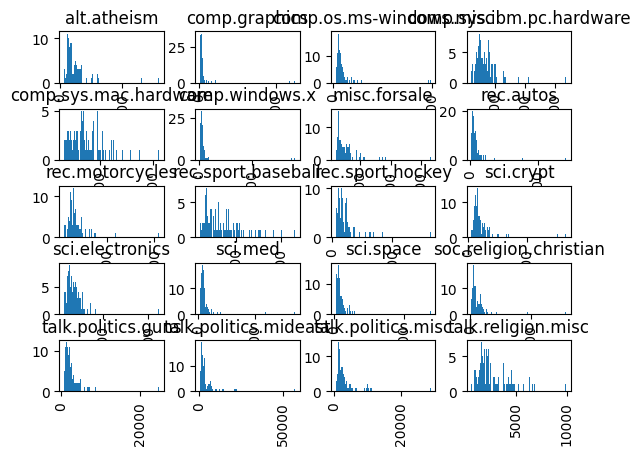

In [11]:
## Plotting Histogram
import matplotlib.pyplot as plt
plt.figure(figsize=(40,20))
df.hist(by='Labels',bins=100);

In [12]:
df['len'].describe()

,len
count,2000.000000
mean,2324.978000
std,3590.560226
min,425.000000
25%,1147.000000
50%,1605.500000
75%,2374.500000
max,62290.000000


In [13]:
df[df['len']==425.000].iloc[0,1]

'comp.graphics'

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
 2   len     2000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 47.0+ KB


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
len,2000.0,2324.978,3590.560226,425.0,1147.0,1605.5,2374.5,62290.0


In [16]:
## category count
df['Labels'].value_counts()

,count
Labels,
alt.atheism,100
comp.graphics,100
comp.os.ms-windows.misc,100
comp.sys.ibm.pc.hardware,100
comp.sys.mac.hardware,100
comp.windows.x,100
misc.forsale,100
rec.autos,100
rec.motorcycles,100


**Preprocessing the data by cleaning the text**

In [17]:
##Preprocess the data by cleaning the text (removing punctuation, converting to lowercase, etc.), tokenizing, and removing stopwords.

In [18]:
## converting to lower case
df['Data']=df['Data'].str.lower()

In [19]:
df.head()

,Data,Labels,len
0,path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,5972
1,newsgroups: alt.atheism\npath: cantaloupe.srv....,alt.atheism,1336
2,path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,3116
3,path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,15910
4,xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,3264


In [20]:
## to check the punctuation in English
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [21]:
## to check the stopwords
import nltk ## nltk-Natural Language Toolkit
nltk.download('all') ## downloads all the functions under nltk

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [22]:
!pip install spacy

In [23]:
!pip install wordcloud

In [24]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 39.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [25]:
from nltk.corpus import stopwords


In [26]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [30]:
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [31]:
stem=PorterStemmer()
lem=WordNetLemmatizer()


In [28]:
import spacy
nlp=spacy.load('en_core_web_sm')

In [29]:
## To create a function to clean the text
def clean_words(text):
    doc= nlp(text)
    clean_text=[x.lemma_ for x in doc if not x.is_stop and not x.is_punct and not x.like_num and not x.is_bracket and not x.pos_ in ['SYM']]
    clean_text=[stem.stem(x) for x in clean_text]
    return clean_text   ## SYM--> symbolic Parts of speech

**•	Perform feature extraction to convert text data into a format that can be used by the Naive Bayes model, using techniques such as TF-IDF.**

In [32]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer

In [33]:
count=CountVectorizer(analyzer=clean_words) ##Here we have defined the function with cleaning procrss

In [34]:
x=count.fit_transform(df['Data'])

In [36]:
x.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [37]:
tfidf=TfidfTransformer()

In [38]:
arr=tfidf.fit_transform(x)

In [41]:
arr1=x.toarray()
arr1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [42]:
import numpy as np
np.unique(arr1)

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
         22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
         33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
         44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,
         55,   56,   57,   58,   59,   60,   61,   62,   63,   64,   65,
         66,   67,   68,   69,   70,   71,   72,   73,   74,   75,   76,
         77,   78,   79,   80,   81,   82,   83,   84,   85,   86,   87,
         88,   89,   90,   91,   92,   93,   94,   95,   96,   97,   98,
         99,  100,  101,  102,  103,  104,  105,  107,  108,  109,  111,
        112,  115,  116,  117,  118,  120,  126,  127,  128,  130,  131,
        132,  134,  136,  138,  139,  142,  144,  145,  146,  147,  149,
        153,  154,  155,  156,  157,  159,  160,  170,  175,  176,  177,
        183,  188,  200,  203,  206,  225,  230,  2

2. Naive Bayes Model for Text Classification

•	Split the data into training and test sets.

•	Implement a Naive Bayes classifier to categorize the blog posts into their respective categories. You can use libraries like scikit-learn for this purpose.

•	Train the model on the training set and make predictions on the test set.


In [ ]:
## Applying Naive Baye's Theorem
## method 1 (without splitting into training and testing)

In [47]:
from sklearn.naive_bayes import MultinomialNB
mul=MultinomialNB()
mul.fit(arr1,df['Labels'])
y_pred=mul.predict(arr1)

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(df['Labels'],y_pred)

0.9805

In [53]:
##Method 2 (with splitting into training and testing)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df['Data'],df['Labels'],train_size=0.75,random_state=100)

In [54]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1500,)
(500,)
(1500,)
(500,)


In [55]:
from sklearn.pipeline import Pipeline

In [58]:
pipeline=Pipeline([
    ('count',CountVectorizer(analyzer=clean_words)),
    ('tfidf',TfidfTransformer()),
    ('mul',MultinomialNB())
])

In [59]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('count',
                 CountVectorizer(analyzer=<function clean_words at 0x7c2205df57e0>)),
                ('tfidf', TfidfTransformer()), ('mul', MultinomialNB())])

In [60]:
y_pred=pipeline.predict(x_test)

In [61]:
accuracy_score(y_test,y_pred)

0.79

3. Sentiment Analysis

•	Choose a suitable library or method for performing sentiment analysis on the blog post texts.

•	Analyze the sentiments expressed in the blog posts and categorize them as positive, negative, or neutral. Consider only the Data column and get the sentiment for each blog.

•	Examine the distribution of sentiments across different categories and summarize your findings.
